# NLP
* CLASSIFICATION
* SENTIMENT ANALYSIS

![](https://dynamic-media-cdn.tripadvisor.com/media/photo-o/1a/cf/e1/38/bacchanal-buffet.jpg?w=700&h=400&s=1)

Bu projede Bacchanal Buffet hakkındaki yorumların duygu analizini yapıp, yorumları sınıflandıracağız.

In [1]:
import pandas as pd

import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_csv("restaurant.csv")

In [3]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,After getting food poisoning at the Palms hote...,2012-12-04 03:10:18
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,"""A feast worthy of Gods""\n\nBaccarnal Buffet i...",2014-01-17 00:50:50
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,The crab legs are better than the ones at Wick...,2015-06-08 18:03:09
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,Not worth it! Too salty food and expensive! Th...,2016-12-19 16:15:29
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,I would give this infinite stars if I could. M...,2015-07-28 07:13:17


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10417 entries, 0 to 10416
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Unnamed: 0   10417 non-null  int64 
 1   review_id    10417 non-null  object
 2   user_id      10417 non-null  object
 3   business_id  10417 non-null  object
 4   stars        10417 non-null  int64 
 5   useful       10417 non-null  int64 
 6   funny        10417 non-null  int64 
 7   cool         10417 non-null  int64 
 8   text         10417 non-null  object
 9   date         10417 non-null  object
dtypes: int64(5), object(5)
memory usage: 814.0+ KB


## Yorum Verilerini Grafiklerle Görselleştirelim

In [5]:
import seaborn as sns

<Axes: ylabel='count'>

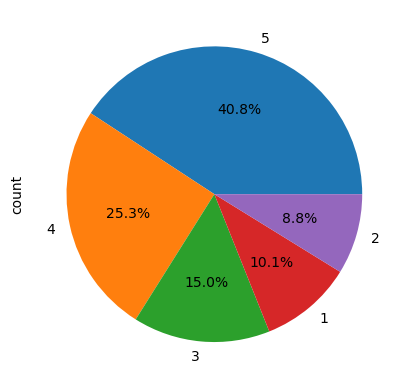

In [6]:
# Mesajların yıldız sayılarına göre dağılımları
df["stars"].value_counts().plot.pie(autopct="%1.1f%%")

In [7]:
# Mesaj sayılarının yıllara göre dağılımları
df["year"]=pd.DatetimeIndex(df["date"]).year

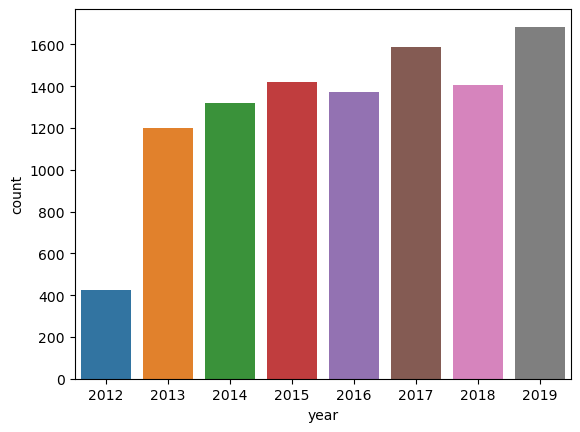

In [8]:
sns.countplot(x=df["year"]);

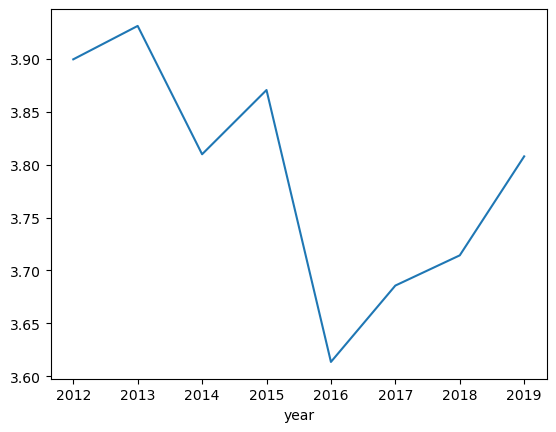

In [9]:
# Yıldız ortalamalarının yıllara göre dağılımları
df.groupby("year")["stars"].mean().plot();

### Text Processing

In [10]:
# Sentiment özelliği ekleyelim
df.loc[df["stars"] == 3, "class" ] = "neutral"
df.loc[df["stars"] < 3, "class" ] = "negative"
df.loc[df["stars"] > 3, "class" ] = "positive"
df = df[["stars", "class", "text"]]
df.head()

,stars,class,text
0,5,positive,After getting food poisoning at the Palms hote...
1,4,positive,"""A feast worthy of Gods""\n\nBaccarnal Buffet i..."
2,4,positive,The crab legs are better than the ones at Wick...
3,1,negative,Not worth it! Too salty food and expensive! Th...
4,5,positive,I would give this infinite stars if I could. M...


In [11]:
# 1- Küçük harfe çevir
df["text"]=df["text"].str.lower()

In [12]:
# 2 - Noktalama işaretlerini kaldır
df["text"]=df["text"].str.replace('[^\w\s]', '', regex=True)

In [13]:
# 3 - Rakamları kaldır
df["text"]=df["text"].str.replace('\d+', '', regex=True)

In [14]:
# 4 - Satır sonu karakterlerini kaldır
df["text"]=df["text"].str.replace('\n', '', regex=True).str.replace('\r', '', regex=True)

In [17]:
# İngilizce dışı mesaj var mı bakalım
from langdetect import detect

In [18]:
df["lang"]=df["text"].apply(detect)

In [19]:
df["lang"].value_counts()

lang
en       10374
es          10
zh-cn        7
ja           7
ko           6
fr           5
de           4
da           2
pt           1
sk           1
Name: count, dtype: int64

In [20]:
df=df[df["lang"]=="en"]

### Classification

In [33]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [82]:
from textblob import TextBlob
from nltk.stem import PorterStemmer
pr=PorterStemmer()

In [24]:
# 7 - Lemma ve Stema
def lemmafn(text):
    words=TextBlob(text).words
    return [pr.stem(word) for word in words]

In [77]:
x=df["text"] 
y=df["class"] 

In [78]:
x_train, x_test, y_train, y_test = train_test_split(x,y, random_state=42, test_size=.2)

In [84]:
# Farklı Vectorize ile Farklı Modelleri deneyelim
def algo_test(vect, mdl):
    x_train_dtm = vect.fit_transform(x_train)
    print ('Features: ', x_train_dtm.shape[1])
    x_test_dtm = vect.transform(x_test)
    model = mdl.fit(x_train_dtm, y_train)
    pred = model.predict(x_test_dtm)
    print ('Accuracy: ', accuracy_score(y_test, pred))

In [79]:
# Modeller
l = LogisticRegression()
kn= KNeighborsClassifier()
d = DecisionTreeClassifier()
r = RandomForestClassifier()
ab = AdaBoostClassifier()
gb= GradientBoostingClassifier()
m = MultinomialNB()
b = BernoulliNB()

modeller=[l, kn, d, r, ab, gb, m, b]
isimler=["LogisticRegression", "KNeighborsClassifier", "DecisionTreeClassifier", "RandomForestClassifier", 
         "AdaBoostClassifier", "GradientBoostingClassifier", "MultinomialNB", "BernoulliNB"]

In [81]:
def vect_test(vect):
    for i in range(8):
        model=modeller[i]
        isim=isimler[i]
        print(isim, "Modeli eğitiliyor:")
        algo_test(vect, model)

In [85]:
#Count Vectorizer
vect = CountVectorizer()
vect_test(vect)

LogisticRegression Modeli eğitiliyor:
Features:  27719
Accuracy:  0.7913253012048193
KNeighborsClassifier Modeli eğitiliyor:
Features:  27719
Accuracy:  0.6737349397590362
DecisionTreeClassifier Modeli eğitiliyor:
Features:  27719
Accuracy:  0.6506024096385542
RandomForestClassifier Modeli eğitiliyor:
Features:  27719
Accuracy:  0.7012048192771084
AdaBoostClassifier Modeli eğitiliyor:
Features:  27719
Accuracy:  0.7604819277108433
GradientBoostingClassifier Modeli eğitiliyor:
Features:  27719
Accuracy:  0.7706024096385542
MultinomialNB Modeli eğitiliyor:
Features:  27719
Accuracy:  0.7744578313253012
BernoulliNB Modeli eğitiliyor:
Features:  27719
Accuracy:  0.6809638554216867


In [86]:
#Count Vectorizer, stopwords, analyzer
vect=CountVectorizer(stop_words="english", analyzer=lemmafn)
vect_test(vect)

LogisticRegression Modeli eğitiliyor:
Features:  22286
Accuracy:  0.7898795180722892
KNeighborsClassifier Modeli eğitiliyor:
Features:  22286
Accuracy:  0.6621686746987951
DecisionTreeClassifier Modeli eğitiliyor:
Features:  22286
Accuracy:  0.6655421686746988
RandomForestClassifier Modeli eğitiliyor:
Features:  22286
Accuracy:  0.6983132530120482
AdaBoostClassifier Modeli eğitiliyor:
Features:  22286
Accuracy:  0.7706024096385542
GradientBoostingClassifier Modeli eğitiliyor:
Features:  22286
Accuracy:  0.7710843373493976
MultinomialNB Modeli eğitiliyor:
Features:  22286
Accuracy:  0.7778313253012048
BernoulliNB Modeli eğitiliyor:
Features:  22286
Accuracy:  0.689156626506024


In [87]:
#Count Vectorizer, stopwords, analyzer, ngram, max features
vect=CountVectorizer(stop_words="english", analyzer=lemmafn, ngram_range=(1,2), max_features=10000)
vect_test(vect)

LogisticRegression Modeli eğitiliyor:
Features:  10000
Accuracy:  0.788433734939759
KNeighborsClassifier Modeli eğitiliyor:
Features:  10000
Accuracy:  0.6660240963855422
DecisionTreeClassifier Modeli eğitiliyor:
Features:  10000
Accuracy:  0.6578313253012048
RandomForestClassifier Modeli eğitiliyor:
Features:  10000
Accuracy:  0.7113253012048193
AdaBoostClassifier Modeli eğitiliyor:
Features:  10000
Accuracy:  0.7706024096385542
GradientBoostingClassifier Modeli eğitiliyor:
Features:  10000
Accuracy:  0.771566265060241
MultinomialNB Modeli eğitiliyor:
Features:  10000
Accuracy:  0.7855421686746988
BernoulliNB Modeli eğitiliyor:
Features:  10000
Accuracy:  0.6771084337349398


In [89]:
# TF-IDF Vectorizing
tfvect=TfidfVectorizer()
vect_test(tfvect)

LogisticRegression Modeli eğitiliyor:
Features:  27719
Accuracy:  0.8072289156626506
KNeighborsClassifier Modeli eğitiliyor:
Features:  27719
Accuracy:  0.6587951807228916
DecisionTreeClassifier Modeli eğitiliyor:
Features:  27719
Accuracy:  0.6539759036144578
RandomForestClassifier Modeli eğitiliyor:
Features:  27719
Accuracy:  0.6978313253012048
AdaBoostClassifier Modeli eğitiliyor:
Features:  27719
Accuracy:  0.7595180722891566
GradientBoostingClassifier Modeli eğitiliyor:
Features:  27719
Accuracy:  0.7628915662650603
MultinomialNB Modeli eğitiliyor:
Features:  27719
Accuracy:  0.6520481927710844
BernoulliNB Modeli eğitiliyor:
Features:  27719
Accuracy:  0.6809638554216867


In [90]:
# TF-IDF Vectorizing, stop_word, analyzer
tfvect=TfidfVectorizer(stop_words="english", analyzer=lemmafn)
vect_test(tfvect)

LogisticRegression Modeli eğitiliyor:
Features:  22286
Accuracy:  0.8057831325301205
KNeighborsClassifier Modeli eğitiliyor:
Features:  22286
Accuracy:  0.655421686746988
DecisionTreeClassifier Modeli eğitiliyor:
Features:  22286
Accuracy:  0.6650602409638554
RandomForestClassifier Modeli eğitiliyor:
Features:  22286
Accuracy:  0.6843373493975904
AdaBoostClassifier Modeli eğitiliyor:
Features:  22286
Accuracy:  0.752289156626506
GradientBoostingClassifier Modeli eğitiliyor:
Features:  22286
Accuracy:  0.7773493975903615
MultinomialNB Modeli eğitiliyor:
Features:  22286
Accuracy:  0.653012048192771
BernoulliNB Modeli eğitiliyor:
Features:  22286
Accuracy:  0.689156626506024


In [91]:
# TF-IDF Vectorizing, stop_word, analyzer, ngram, max features
tfvect=TfidfVectorizer(stop_words="english", analyzer=lemmafn, ngram_range=(1,2), max_features=10000)
vect_test(tfvect)

LogisticRegression Modeli eğitiliyor:
Features:  10000
Accuracy:  0.8053012048192771
KNeighborsClassifier Modeli eğitiliyor:
Features:  10000
Accuracy:  0.6626506024096386
DecisionTreeClassifier Modeli eğitiliyor:
Features:  10000
Accuracy:  0.6481927710843374
RandomForestClassifier Modeli eğitiliyor:
Features:  10000
Accuracy:  0.7074698795180723
AdaBoostClassifier Modeli eğitiliyor:
Features:  10000
Accuracy:  0.756144578313253
GradientBoostingClassifier Modeli eğitiliyor:
Features:  10000
Accuracy:  0.7773493975903615
MultinomialNB Modeli eğitiliyor:
Features:  10000
Accuracy:  0.6602409638554216
BernoulliNB Modeli eğitiliyor:
Features:  10000
Accuracy:  0.6771084337349398


In [92]:
# TF-IDF Vectorizing, stop_word, ngram
tfvect=TfidfVectorizer(stop_words="english", ngram_range=(1,2))
vect_test(tfvect)

LogisticRegression Modeli eğitiliyor:
Features:  299061
Accuracy:  0.7855421686746988
KNeighborsClassifier Modeli eğitiliyor:
Features:  299061
Accuracy:  0.7146987951807229
DecisionTreeClassifier Modeli eğitiliyor:
Features:  299061
Accuracy:  0.6631325301204819
RandomForestClassifier Modeli eğitiliyor:
Features:  299061
Accuracy:  0.7040963855421687
AdaBoostClassifier Modeli eğitiliyor:
Features:  299061
Accuracy:  0.7479518072289156
GradientBoostingClassifier Modeli eğitiliyor:
Features:  299061
Accuracy:  0.756144578313253
MultinomialNB Modeli eğitiliyor:
Features:  299061
Accuracy:  0.6520481927710844
BernoulliNB Modeli eğitiliyor:
Features:  299061
Accuracy:  0.6539759036144578


### Sentiment Analysis

In [34]:
def get_sentiment(text):
    analysis = TextBlob(text) 
    if analysis.sentiment.polarity > 0.1: 
        return 'positive'
    elif analysis.sentiment.polarity < -0.1: 
        return 'negative'
    else: 
        return 'neutral'

In [35]:
df["sentiment"]=df["text"].map(get_sentiment)

In [36]:
df.head()

,Unnamed: 0,review_id,user_id,business_id,stars,useful,funny,cool,text,date,year,lang,sentiment
0,2370338,_WTGv5XnA-qb_XD1D7Z0jg,6PgdGb3HrZdsfl2GiULo8w,RESDUcs7fIiihp38-d6_6g,5,0,1,0,after getting food poisoning at the palms hote...,2012-12-04 03:10:18,2012,en,positive
1,2370357,JlNnsvMPLK_1-X2hwzK24w,IS9yw8P2uAPBX6FNLLX4KA,RESDUcs7fIiihp38-d6_6g,4,39,21,29,a feast worthy of godsbaccarnal buffet in caes...,2014-01-17 00:50:50,2014,en,positive
2,2370373,hBkoWffORRb6aqKhC_Li2A,uZdFsE_aHbFBChgN6Xa8tw,RESDUcs7fIiihp38-d6_6g,4,1,1,1,the crab legs are better than the ones at wick...,2015-06-08 18:03:09,2015,en,negative
3,2370411,rbkxvrgZg5kdCL2a66QYmA,8ZWJNAEWsymXDzKx3B0tTQ,RESDUcs7fIiihp38-d6_6g,1,0,0,0,not worth it too salty food and expensive this...,2016-12-19 16:15:29,2016,en,negative
4,2370500,5tw_pedoHVi9bgeiBNsISg,E0sm4Ve7ifanFYeQMcV8Eg,RESDUcs7fIiihp38-d6_6g,5,0,0,0,i would give this infinite stars if i could my...,2015-07-28 07:13:17,2015,en,positive


In [37]:
df["text"][2]

'the crab legs are better than the ones at wicked spoon and they have huge prawns here  the sheer selection was insane  i didnt get to save any room for pasta pizza cheese or sushi because i was oinking out on the crab legs prawns and dessert  the tonkatsu ramen is ok and had a piece of pork in itits  for two people for sunday brunch with bottomless mimosas and bloody marys  the bloody marys were disgusting  we came around p at the kiosk and got in before p when they up the dinner prices  the dessert was pretty good  they have shaved ice crepes black sesame and green mint tea cream  they also have taffy gummy bears and the mini desserts'

In [38]:
TextBlob(df["text"][2]).sentiment

Sentiment(polarity=-0.13472222222222224, subjectivity=0.7319444444444446)

In [39]:
df["sentiment"].value_counts()

sentiment
positive    8060
neutral     1958
negative     399
Name: count, dtype: int64

<Axes: ylabel='count'>

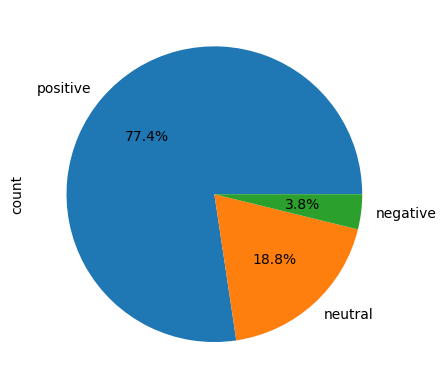

In [40]:
df["sentiment"].value_counts().plot.pie(autopct="%1.1f%%")

### Word Clouds

In [41]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
import matplotlib.pyplot as plt
from PIL import Image
import numpy as np

def wc(data, bgcolor):
    plt.figure(figsize=(10,10))
    mask=np.array(Image.open("cloud.png"))
    wc=WordCloud(background_color=bgcolor, stopwords=STOPWORDS, mask=mask)
    wc.generate(" ".join(data))
    plt.imshow(wc)
    plt.axis("off")

In [42]:
pos=df[df['sentiment']=="positive"]["text"]
neg=df[df['sentiment']=="negative"]["text"]

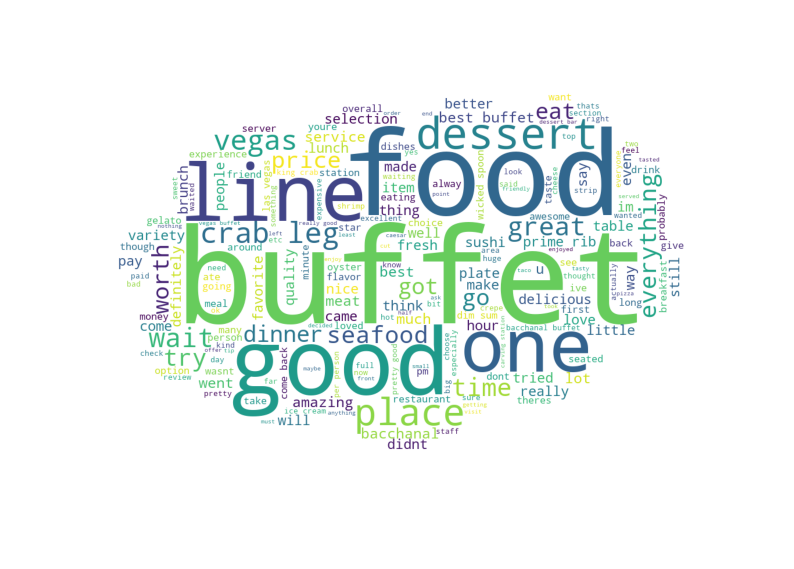

In [43]:
wc(pos, "white")

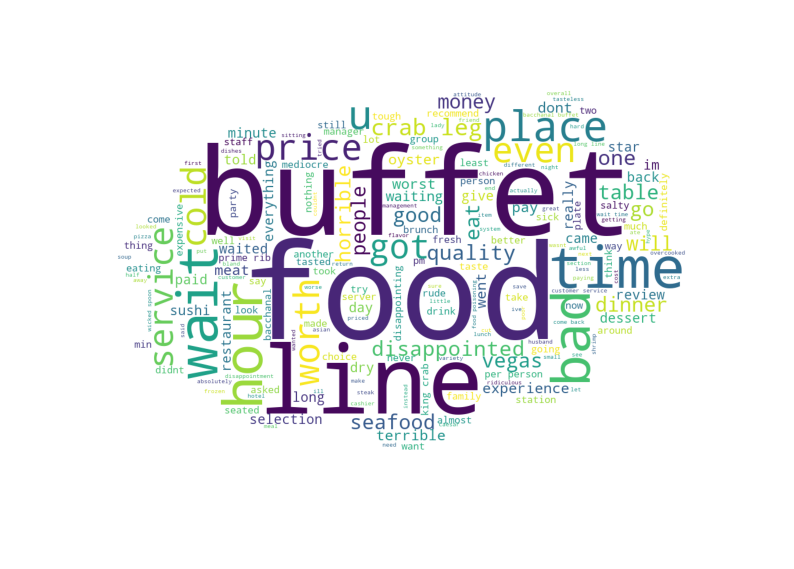

In [44]:
wc(neg, "white")

### Top Negative Words

In [105]:
dfneg=df[df["class"]=="negative"]
dfneg.reset_index(drop=True, inplace=True)

In [122]:
text_data = dfneg["text"].tolist()
vectorizer = CountVectorizer(stop_words='english')
X = vectorizer.fit_transform(text_data)
features = vectorizer.get_feature_names_out()
word_frequencies = X.sum(axis=0).A1

top_7_indices = word_frequencies.argsort()[:-8:-1]
top_7_words = [features[idx] for idx in top_7_indices]
top_7_frequencies = [word_frequencies[idx] for idx in top_7_indices]

for word, freq in zip(top_7_words, top_7_frequencies):
    print(f"Word: {word}, Frequency: {freq}")

Word: food, Frequency: 2663
Word: buffet, Frequency: 2487
Word: line, Frequency: 1491
Word: good, Frequency: 1226
Word: wait, Frequency: 1104
Word: time, Frequency: 1100
Word: just, Frequency: 1087


## Sonuç

Bu projede doğal dil işleme uygulamalarından biri olan `sentiment analizi` uygulaması yaparak mesajları sınıflandıran model geliştirdik.